In [3]:
import numpy as np
import pandas as pd
import seaborn as snr
import statistics as stc

In [4]:
# lendo o csv no formato correto com sep=;
data = pd.read_csv('tempo.csv', sep= ";")
data.describe()

,Temperatura,Umidade
count,14.000000,13.000000
mean,155.571429,89.769231
std,306.433759,34.540203
min,64.000000,65.000000
25%,69.250000,70.000000
50%,73.500000,85.000000
75%,80.750000,90.000000
max,1220.000000,200.000000


In [5]:
data.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [6]:
data.shape

(14, 5)

In [7]:
''' analise de variavel categorica = amostra "menos" 
    deve ser categorizada com outro valor'''
aparencia_group = data.groupby(data['Aparencia']).size()
aparencia_group

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [8]:
''' analise de variavel categorica = sem problemas'''
vento_group = data.groupby(data['Vento']).size()
vento_group

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [9]:
''' analise de variavel categorica = sem problemas'''
jogar_group = data.groupby(data['Jogar']).size()
jogar_group

Jogar
nao    5
sim    9
dtype: int64

In [10]:
''' analise de variável numérica = média e mediana muito
    diferentes, indicando um grande número de valores
    outliers, isto é evidenciado pelos gráficos.'''
data['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

C:\Users\Kevin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Temperatura')

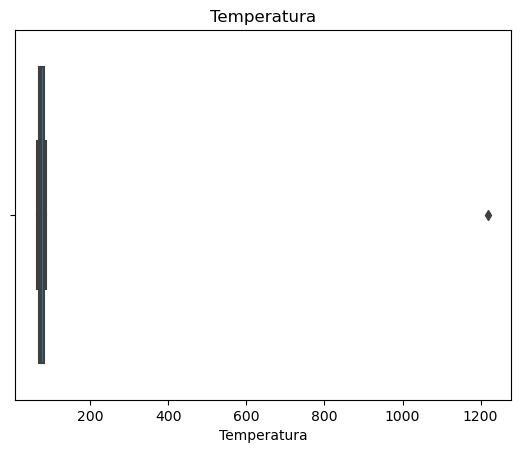

In [11]:
snr.boxplot(data['Temperatura']).set_title('Temperatura')

C:\Users\Kevin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Temperatura')

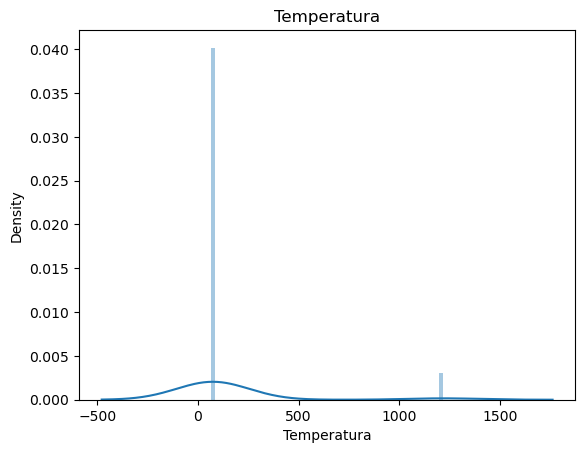

In [12]:
snr.distplot(data['Temperatura']).set_title('Temperatura')

In [13]:
''' analise de variavel numerica = existem valores outliers
    que devem ser tratados'''
data['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

C:\Users\Kevin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Umidade')

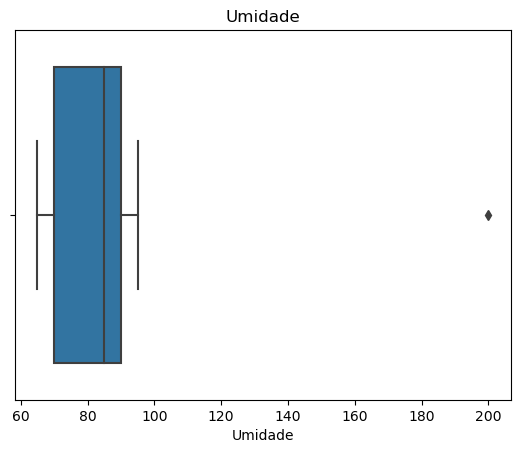

In [14]:
snr.boxplot(data['Umidade']).set_title('Umidade')

C:\Users\Kevin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Umidade')

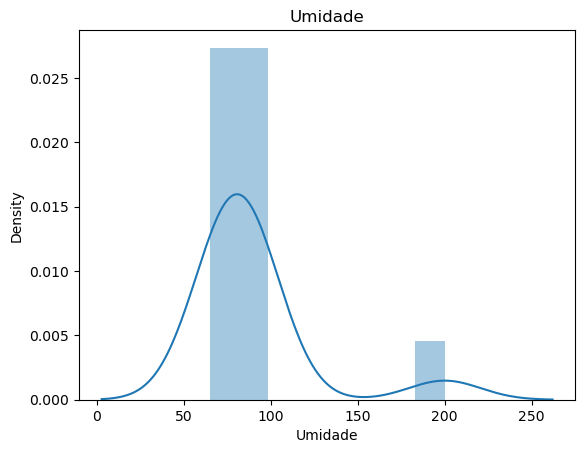

In [15]:
snr.distplot(data['Umidade']).set_title('Umidade')

In [16]:
# verificando valores null no dataset
data.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [17]:
''' variaveis categoricas = substituir valores errados pela moda
    variaveis numericas   = substituir valores errados pela mediana e remover outliers
'''

' variaveis categoricas = substituir valores errados pela moda\n    variaveis numericas   = substituir valores errados pela mediana e remover outliers\n'

In [18]:
# resolvendo problema de valores NaN em Umidade
mediana_umidade = stc.median(data['Umidade'])
print(mediana_umidade)
data['Umidade'].fillna(mediana_umidade, inplace=True)
data.isnull().sum()

85.5


Aparencia      0
Temperatura    0
Umidade        0
Vento          1
Jogar          0
dtype: int64

In [19]:
# resolvendo problema de valores NaN em Vento
data['Vento'].fillna('FALSO', inplace=True)
data.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

In [20]:
# resolvendo problema de amostra com classificacao de aparencia errada
data.loc[data['Aparencia'].isin(['menos']), 'Aparencia'] = 'chuva'
aparencia_group = data.groupby(data['Aparencia']).size()
aparencia_group

Aparencia
chuva      6
nublado    3
sol        5
dtype: int64

In [21]:
# resolvendo problema de valores outliers em Tempo
print(data['Temperatura'].describe(), end='\n\n')

mediana_temperatura = stc.median(data['Temperatura'])
print(mediana_temperatura, end='\n\n')

data.loc[(data['Temperatura'] < -130) | (data['Temperatura'] > 130)] = mediana_temperatura
print(data['Temperatura'].describe(), end='\n\n')

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

73.5

count    14.000000
mean     73.678571
std       6.556286
min      64.000000
25%      69.250000
50%      72.750000
75%      78.750000
max      85.000000
Name: Temperatura, dtype: float64



C:\Users\Kevin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Temperatura')

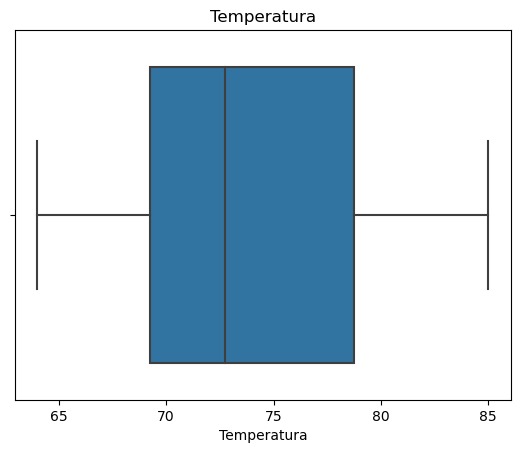

In [22]:
snr.boxplot(data['Temperatura']).set_title('Temperatura')

In [23]:
# resolvendo problema de valores outliers em Umidade
print(data['Umidade'].describe(), end='\n\n')

mediana_umidade = stc.median(data['Umidade'])
print(mediana_umidade, end='\n\n')

data.loc[(data['Umidade'] < 0) | (data['Umidade'] > 100)] = mediana_umidade 
print(data['Umidade'].describe(), end='\n\n')

count     14.000000
mean      87.928571
std       33.425495
min       65.000000
25%       70.875000
50%       82.500000
75%       89.000000
max      200.000000
Name: Umidade, dtype: float64

82.5

count    14.000000
mean     79.535714
std       8.804423
min      65.000000
25%      70.875000
50%      81.250000
75%      85.875000
max      91.000000
Name: Umidade, dtype: float64



C:\Users\Kevin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Umidade')

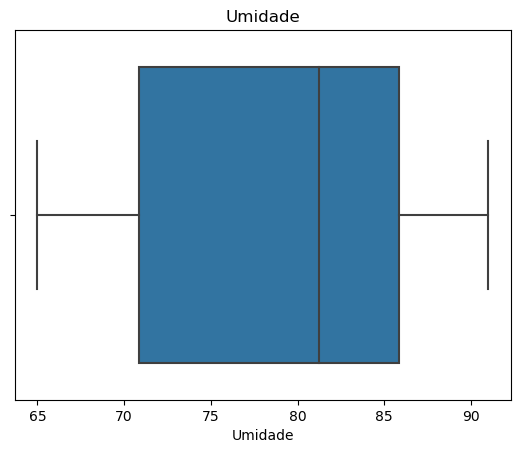

In [24]:
snr.boxplot(data['Umidade']).set_title('Umidade')

In [26]:
# buscando dados duplicados
data[data.duplicated(data['Index'], keep=False)]

KeyError: 'Index'